In [1]:
import numpy as np
import matplotlib.pyplot as plt



In [ ]:
lengths = []

f = open("tapResult.csv", "r")
for x in f:
    words = x.split(',')
    lengths.append(float(words[27]))
unique = [x for i, x in enumerate(lengths) if i == lengths.index(x)]
x = list(range(0, len(unique)))

plt.plot(x, unique, 'ro-')
plt.show()

In [ ]:
# direction changes only when difference in gain is negative 
lengths = []
gain = []

f = open("tapResultDir.txt", "r")
for x in f:
    words = x.split(',')
    lengths.append(float(words[27]))
    gain.append(float(words[28]))
    
unique = [x for i, x in enumerate(lengths) if i == lengths.index(x)]
x = list(range(0, len(unique)))

plt.plot(x, unique, 'ro-')
plt.grid(True)
plt.show()

In [ ]:

uniqueGain = [x for i, x in enumerate(gain) if i == gain.index(x)]
print(uniqueGain)
plt.plot(x, uniqueGain, 'ro-')
plt.grid(True)
plt.show()

In [ ]:
# direction changes only when difference in gain is negative 
lengths = []
gain = []
delta = []
th = []
thNorm = []

f = open("tapResultsNewTh.txt", "r")
for x in f:
    words = x.split(',')
   
    lengths.append(float(words[28]))
    gain.append(float(words[29]))
    delta.append(float(words[30]))
    th.append(float(words[11]))
    thNorm.append(float(words[12]))

unique = [x for i, x in enumerate(lengths) if i == lengths.index(x)]
print(unique)
x = list(range(0, len(unique)))
uniqueDelta = [np.sign(x) for i, x in enumerate(delta) if i == delta.index(x)]
plt.plot(x, uniqueDelta, 'bo-')
plt.plot(x, unique, 'ro-')
plt.grid(True)
plt.show()

In [ ]:
x = list(range(0, len(th)))

print(min(th))
print(max(th))
plt.plot(x, th, 'bo-')
plt.plot(x, thNorm, 'ro-')
plt.grid(True)
plt.show()

In [ ]:
uniqueGain = [x for i, x in enumerate(gain) if i == gain.index(x)]
print(uniqueGain)
plt.plot(x, uniqueGain, 'ro-')
plt.grid(True)
#plt.show()

uniqueDelta = [x for i, x in enumerate(delta) if i == delta.index(x)]
plt.plot(x, uniqueDelta, 'ro-')
plt.grid(True)
plt.show()

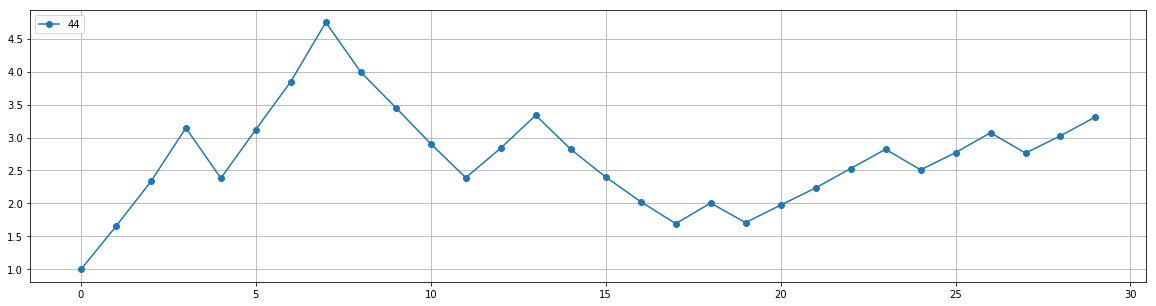

Total time 6.025716666666667


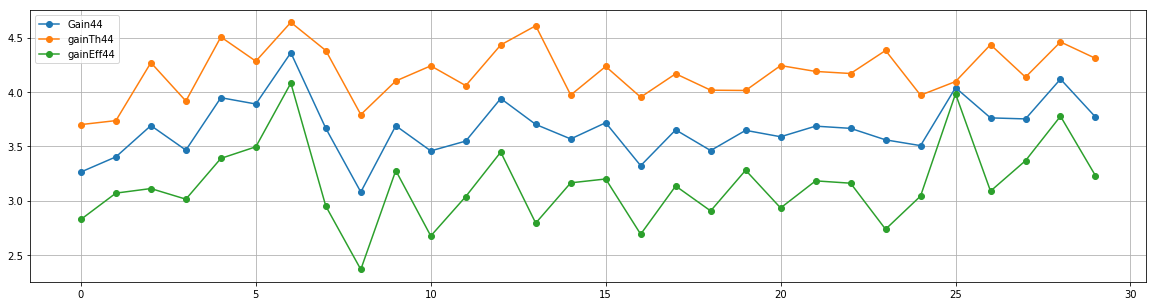

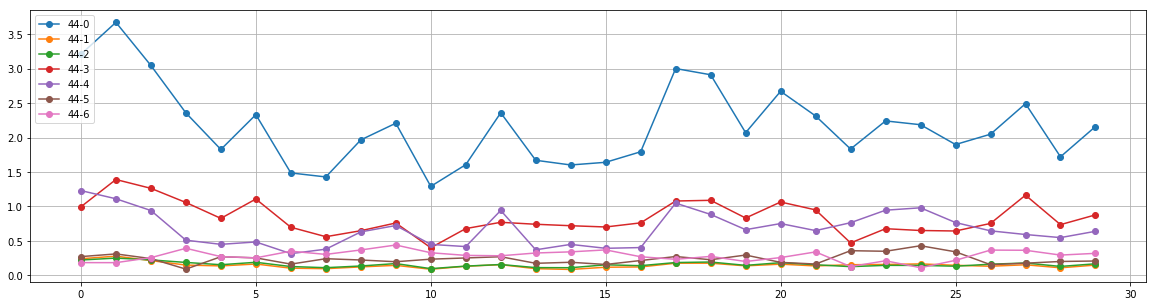

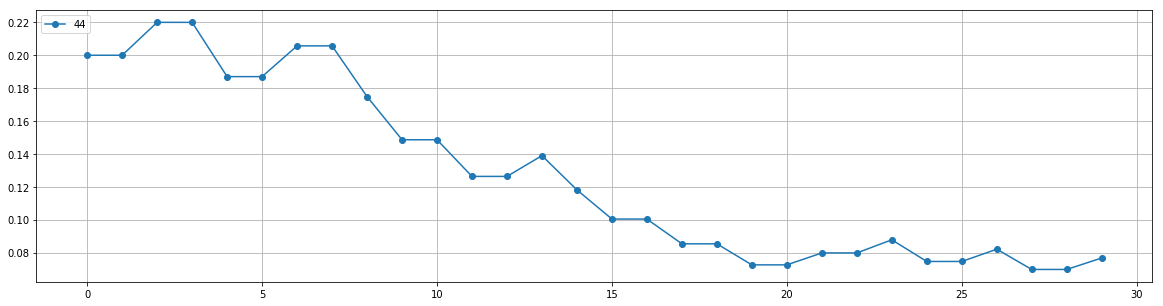

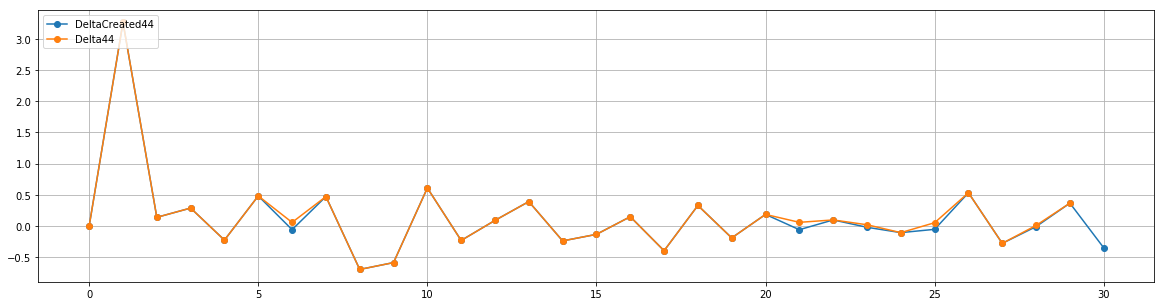

In [14]:
# player 0 = all the shit
# player 1 = something
# player 2 = spiral - random targets
# player 3 = circle - selected targets
# player 4 = spiral - selected targets
# player 5 = circle - selected targets + closer targets
# player 6 = same
# player 7 = 
# player 8 = change effort 
# player 9 = same as 8 

players = [44]
results = []
gradientStats = []
path ="C:\\Users\\huber\\OneDrive\\Dokumenty\\thesis-hubert\\unity\\SmartuistWrapper\\tapResult.csv"
pathA = "E:\\Andreea\\Projects\\Git\\SmartsuitWrapper\\SmartuistWrapper\\tapResult.csv"
pathStats ="C:\\Users\\huber\\OneDrive\\Dokumenty\\thesis-hubert\\unity\\SmartuistWrapper\\tapResult.csv"
pathStatsA = "E:\\Andreea\\Projects\\Git\\SmartsuitWrapper\\SmartuistWrapper\\GradientStats.csv"
plt.rcParams['figure.figsize'] = [20, 5]
# read tap results / player
results = [0] * 100
f = open(pathA, "r")
player = -1
for x in f:
    line = x.split(',')
    if len(line) == 31:
        if int(line[0]) == player:
            results[player].append(line)
        else:
            player = int(line[0])
            results[player] = []
            results[player].append(line)

         
            
for p in players:
    tmp = results[p]
    lengths = []
    gain = []
    delta = []
    th = []
    thNorm = []
    totalTime = 0
    for words in tmp:
        totalTime += float(words[10])
        lengths.append(float(words[28]))
        gain.append(float(words[29]))
        delta.append(float(words[30]))
        th.append(float(words[11]))
        thNorm.append(float(words[12]))
        unique = [x for i, x in enumerate(lengths) if i == lengths.index(x)]
       
        x = list(range(0, len(unique)))
        uniqueGain = [x for i, x in enumerate(gain) if i == gain.index(x)]
    plt.plot(x, unique, 'o-', label=p)

plt.legend(loc='upper left')
plt.grid(True)
plt.show()
print("Total time", totalTime/60000)


# read gradient results / player
gradientStats = [0] * 100
f = open(pathStatsA, "r")
player = -1
for x in f:
    line = x.split(',')
    if int(line[0]) == player:
        gradientStats[player].append(line)
    else:
        player = int(line[0])
        gradientStats[player] = []
        gradientStats[player].append(line)
f.close()  

# gain
batchSize = 8

plt.rcParams['figure.figsize'] = [20, 5]
for p in players:
    tmp = gradientStats[p]
    gain = []
    gainEff = []
    gainTh = []
    for words in tmp:
        gain.append(float(words[5]))
        gainTh.append(float(words[3]))
        gainEff.append(float(words[2]))

   
    x = list(range(0, len(gain)))
    plt.plot(x, gain, 'o-', label="Gain"+str(p))
    plt.plot(x, gainTh, 'o-', label="gainTh"+str(p))
    plt.plot(x, gainEff, 'o-', label="gainEff"+str(p))
    
plt.legend(loc='upper left')
plt.grid(True)
plt.rcParams['figure.figsize'] = [20, 5]
plt.show()

bodyParts =[ [0]*1 for i in range(7)]
for p in players:
    tmp = results[p]

    counter = 0
    for words in tmp:            
        for i in range (7):
            bodyParts[i][bodyParts[i].index(bodyParts[i][-1])] += float(words[21+i])
            
        counter = counter + 1
        if counter == batchSize:
            counter = 0
        if counter == 0:
            for i in range(7):
                bodyParts[i][bodyParts[i].index(bodyParts[i][-1])] /= batchSize
                bodyParts[i].append(0)



z = 0
x = list(range(0, len(bodyParts[0])-2))
for a in bodyParts:
    if z in [0,1,2,3,4,5,6]:
        plt.plot(x,a[:len(a)-2], 'o-', label= str(p) + "-" + str(z))
    z = z + 1
    
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

 
# learning rate
for p in players:
    tmp = gradientStats[p]
    learningRate = []
    for words in tmp:
        learningRate.append(float(words[6]))

    x = list(range(0, len(learningRate)))
    plt.plot(x, learningRate, 'o-', label=p)
        

plt.legend(loc='upper left')
plt.grid(True)
plt.show()

for p in players:
    tmp = gradientStats[p]
    gain = [0]
    prevGain = [0]
    for words in tmp:
        gain.append(float(words[5]))
        prevGain.append(float(words[4]))
    
    
    delta = np.array(gain) - np.array(prevGain)    
    x = list(range(0, len(delta)))
    plt.plot(x, delta, 'o-', label="DeltaCreated"+str(p))
plt.legend(loc='upper left')
plt.grid(True)


# delta
for p in players:
    tmp = results[p]
    delta = []
    for words in tmp:
        delta.append(float(words[30]))

#     smallDeltas = delta.toList()
    delta =  [x for i, x in enumerate(delta) if i == delta.index(x)]
    x = list(range(0, len(delta)))
    plt.plot(x, delta, 'o-', label="Delta"+str(p))
plt.legend(loc='upper left')
plt.grid(True)
plt.show()




In [23]:
# plt.plot(x, uniqueGain, 'go-')
# plt.grid(True)
# plt.show()
# x = list(range(0, len(th)))


# plt.plot(x, th, 'bo-')
# plt.plot(x, thNorm, 'ro-')
# plt.grid(True)
# plt.show()